## Describing the CartPole environment

### Status of system i described by four paramters; $(x, v, \theta, \omega) $:

- $x$ describes horizontal position of cart ($x > 0 \rightarrow $ cart is right from center
- $v$ describes horizontal velocity of cart ($v > 0 \rightarrow $ cart is moving in right
- $\theta $ describes the angle between the pole and the vertical position
- $\omega $ angular velocity of the pole


### There are two possible actions:
- moving right
- moving left


### The game ends when the angle of the pole excedes 15 $^\circ (|\theta| \geq \pi/12 \approx 0.26 )$  

### The goal of the game is to maximize the cumulative reward, which is increased by 1 in each step. 

In [8]:
import gym
import matplotlib.pyplot as plt

In [3]:
env = gym.make("CartPole-v1")

In [4]:
state = env.reset()
print('Sample State:', state)
print('Action Set:', env.action_space)

Sample State: [-0.04081412  0.00041719 -0.04060384  0.04136603]
Action Set: Discrete(2)


## The non-deep learning method

In [5]:
def theta_omega_policy(obs):
    theta, w = obs[2:4]
    
    if abs(theta) < 0.03:
        return 0 if w < 0 else 1
    else:
        return 0 if theta < 0 else 1

In [6]:
cum_reward = []
rounds = 1000

for r in range(rounds):
    current_state = env.reset()
    done = False
    reward = 0
    while not done:
        action = theta_omega_policy(current_state)
        current_state, curr_reward, done, info = env.step(action)
        reward += curr_reward
    
    cum_reward.append(reward)

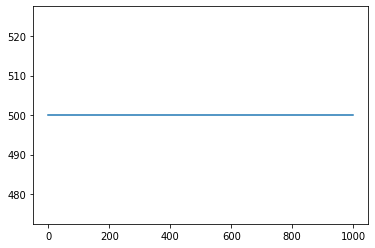

In [9]:
plt.plot(cum_reward)

## The deep learning method

In [10]:
import torch

In [11]:
model = torch.nn.Sequential(
    torch.nn.Linear(4,120),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(120,2),
    torch.nn.Softmax(dim=0)
)

In [16]:
lr = 9e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [49]:
rewards = torch.Tensor([1 for i in range(250)])
gamma = 0.99

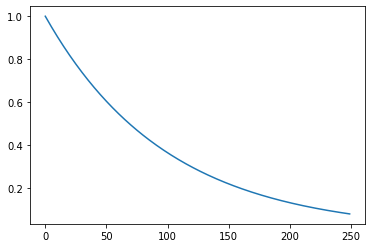

In [50]:
plt.plot(torch.pow(gamma, torch.arange(len(rewards)).float()) * rewards)

In [ ]:
cum_reward = []
rounds = 1000

for r in range(rounds):
    current_state = env.reset()
    done = False
    reward = 0
    
    while not done:
        action = model(torch.from_numpy(current_state).float()).argmax(axis=0).item()
        current_state, curr_reward, done, info = env.step(action)
        reward += curr_reward
    
    cum_reward.append(reward)